Summary of LeNet-5 Architecture




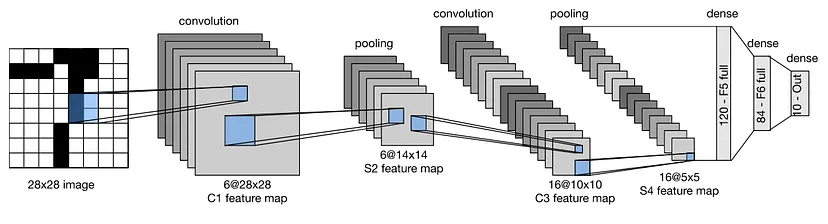

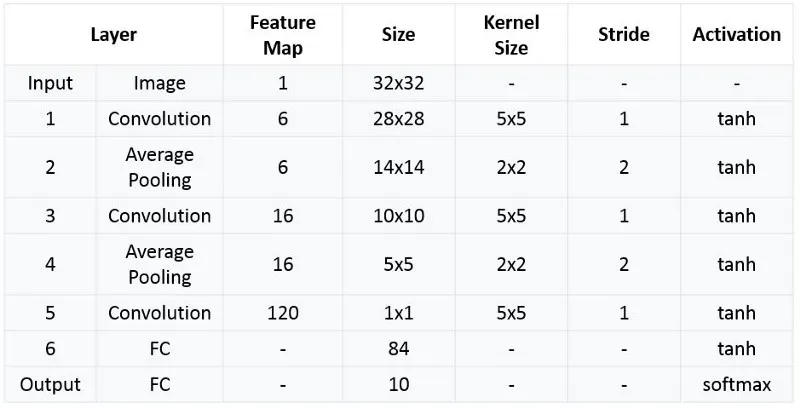

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.models import Sequential
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

In [ ]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Normalization

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)





# Applying LeNet 5 from scratch

In [ ]:
model=Sequential([
    Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh',input_shape=(28,28,1)),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Flatten(),
    Dense(units=120, activation='tanh'),
    Dense(units=84, activation='tanh'),
    Dense(units=10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
history=model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 31s 7ms/step - loss: 0.2024 - accuracy: 0.9397 - val_loss: 0.0930 - val_accuracy: 0.9689
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0787 - accuracy: 0.9755 - val_loss: 0.0744 - val_accuracy: 0.9758
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0585 - accuracy: 0.9822 - val_loss: 0.0649 - val_accuracy: 0.9793
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0480 - accuracy: 0.9850 - val_loss: 0.0566 - val_accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.0574 - val_accuracy: 0.9816


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 6)           906       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 6)           0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 96)                0         
                                                                 
 dense (Dense)               (None, 120)               1

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

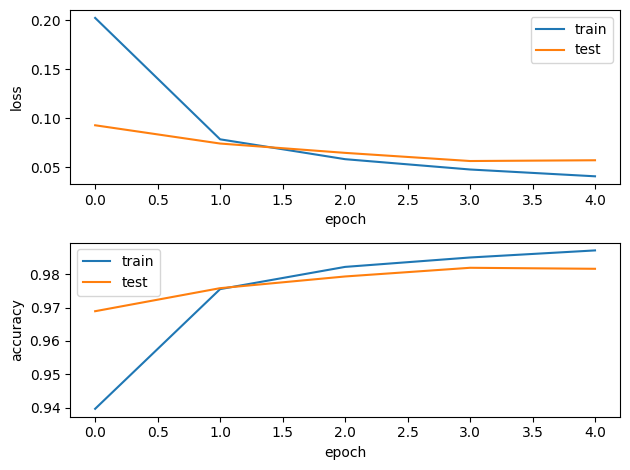

In [ ]:
fig=plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.subplot(2,1,2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.tight_layout()

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0574 - accuracy: 0.9816


[0.05737065523862839, 0.9815999865531921]

In [ ]:
y_predicted=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_predicted=[np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted[:5]

[7, 2, 1, 0, 4]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
con_matrix=confusion_matrix(y_test,y_predicted)

Text(0.5, 23.52222222222222, 'Predicted')

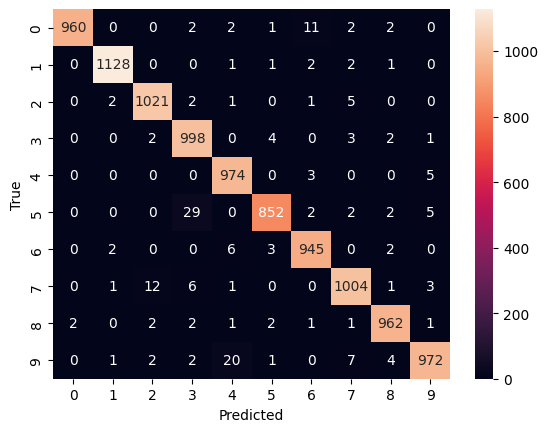

In [ ]:
sns.heatmap(con_matrix,annot=True,fmt="d")
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
CR=classification_report(y_test,y_predicted)
print(CR)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.96      0.99      0.97      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



When using the LeNet-5 model on the MNIST dataset, we achieved an accuracy above 90%. This is a relatively high accuracy, which indicates that the LeNet-5 model is performing well on the MNIST dataset. The MNIST dataset consists of grayscale images of handwritten digits (0-9), and it is a relatively simple and well-studied dataset. The LeNet-5 architecture, with its convolutional and pooling layers, is specifically designed for image recognition tasks, making it effective for the MNIST dataset.

The variation in accuracy between datasets can be attributed to their inherent characteristics. MNIST, a simpler dataset featuring grayscale images primarily containing digits, allows for an easier learning process with less variability, making it conducive for accurate digit classification using architectures like LeNet. However, it's important to note that architectures optimized for datasets like MNIST, which focus on characters and digits, may not generalize well to datasets without such numerical patterns or structures. Achieving higher accuracy on datasets with different characteristics often requires the implementation of more advanced models or techniques capable of capturing intricate patterns and features specific to the nature of the new dataset.






